In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import glob
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
import regex as re
import datetime
import time
import os
import json
import warnings
warnings.filterwarnings('ignore')
import sys
import sqlalchemy
import cx_Oracle
import pymssql
import pyodbc
import multiprocessing as mp

In [4]:
host=''
port=
sname=''
user=''
password=''
conn=cx_Oracle.connect('{}/{}@{}:{}/{}'.format(user,password,host,str(port),sname,charset='iso-8859-1',encoding='UTF-8',nencoding = 'UTF-8'))
cur = conn.cursor()
query_select = """\
select *
  from ANALYS_TOI_DP
 where 
     TOI_DP_2016 IS NOT NULL
    OR TOI_DP_2017 IS NOT NULL
    OR TOI_DP_2018 IS NOT NULL
    OR TOI_DP_2019 IS NOT NULL
    """

In [5]:
cur.execute(query_select)

<cx_Oracle.Cursor on <cx_Oracle.Connection to DW_ANALYTICS@192.168.124.108:1594/DWDEV>>

In [6]:
# Create dataframe
col_names = []
for i in range (0,len(cur.description)):
    col_names.append(cur.description[i][0])
df_dp = pd.DataFrame(cur.fetchall(),columns = col_names)
cur.close()
conn.close()

In [7]:
df_dp.info(verbose = None, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930198 entries, 0 to 6930197
Data columns (total 13 columns):
CUSTOMER_CDE        6930198 non-null object
AGE                 6930198 non-null int64
GENDER_CDE          6930198 non-null object
MARITAL_STATUS      6930198 non-null object
SUB_SECTOR_CDE      6930198 non-null object
OCCUPATION          6930179 non-null object
PROVINCE_CDE        6926623 non-null object
SUB_INDUSTRY_CDE    6930198 non-null object
SUB_SEGMENT_CDE     6930198 non-null object
TOI_DP_2016         3970729 non-null float64
TOI_DP_2017         4491139 non-null float64
TOI_DP_2018         5247649 non-null float64
TOI_DP_2019         5890318 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 687.4+ MB


In [8]:
df_dp.head()

,CUSTOMER_CDE,AGE,GENDER_CDE,MARITAL_STATUS,SUB_SECTOR_CDE,OCCUPATION,PROVINCE_CDE,SUB_INDUSTRY_CDE,SUB_SEGMENT_CDE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019
0,10000839,27,FEMALE,MARRIED,1700,STUDENT,5000,4231,-1,NaN,2100.694475,27259.830180,183894.700577
1,10000840,28,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,418.611170,544.676157,539.999980
2,10000841,29,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,420.138948,544.676157,539.999980
3,10000842,31,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,420.138948,544.676157,539.999980
4,10000846,38,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,418.611170,544.676157,539.999980


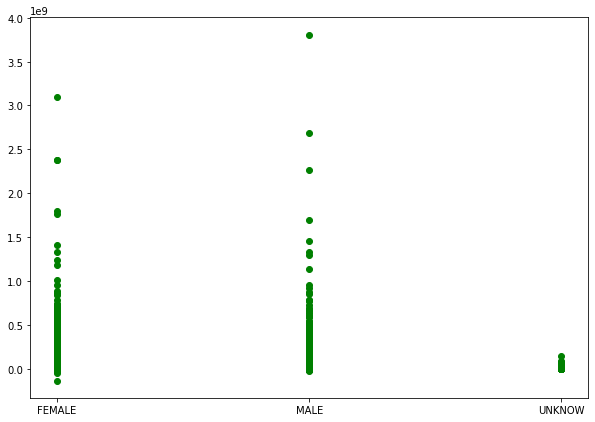

In [19]:
plt.figure(figsize =( 10, 7))
plt.scatter(df_dp.GENDER_CDE, df_dp.TOI_DP_2017,  color = 'green')
plt.show()

In [24]:
df_Occupation = df_dp.groupby(df_dp.OCCUPATION).count().CUSTOMER_CDE

In [25]:
df_Occupation

OCCUPATION
                 5913557
EMPLOYED          552165
OTHER             311829
RETIRED             8272
SELF-EMPLOYED      52602
STUDENT            81433
UNEMPLOYED         10321
Name: CUSTOMER_CDE, dtype: int64

In [9]:
### 1. AGE

In [10]:
# 1. Create AGE_RANGE:
bins = [-np.inf,0,20,30,40,50,60,70,80,np.inf]
df_dp['AGE_RANGE'] = pd.cut(df_dp.AGE, bins = bins )


In [12]:
df_dp.head()

,CUSTOMER_CDE,AGE,GENDER_CDE,MARITAL_STATUS,SUB_SECTOR_CDE,OCCUPATION,PROVINCE_CDE,SUB_INDUSTRY_CDE,SUB_SEGMENT_CDE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019,AGE_RANGE
0,10000839,27,FEMALE,MARRIED,1700,STUDENT,5000,4231,-1,NaN,2100.694475,27259.830180,183894.700577,"(20.0, 30.0]"
1,10000840,28,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,418.611170,544.676157,539.999980,"(20.0, 30.0]"
2,10000841,29,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,420.138948,544.676157,539.999980,"(20.0, 30.0]"
3,10000842,31,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,420.138948,544.676157,539.999980,"(30.0, 40.0]"
4,10000846,38,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,418.611170,544.676157,539.999980,"(30.0, 40.0]"


In [13]:
#  ve bieu do vs AGE
dfAge = df_dp.groupby('AGE_RANGE').sum()


In [14]:
dfAge.TOI_DP_2019.sum()

4790763516508.917

In [16]:
dfAgeDrop = dfAge.drop('AGE', axis = 1)

In [17]:
corr = df_dp.corr()

In [18]:
c = corr.drop(['AGE'], axis = 0)
c = c.drop('AGE', axis = 1)

,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019
TOI_DP_2016,1.000000,0.769711,0.517143,0.393187
TOI_DP_2017,0.769711,1.000000,0.079653,0.551057
TOI_DP_2018,0.517143,0.079653,1.000000,0.089881
TOI_DP_2019,0.393187,0.551057,0.089881,1.000000


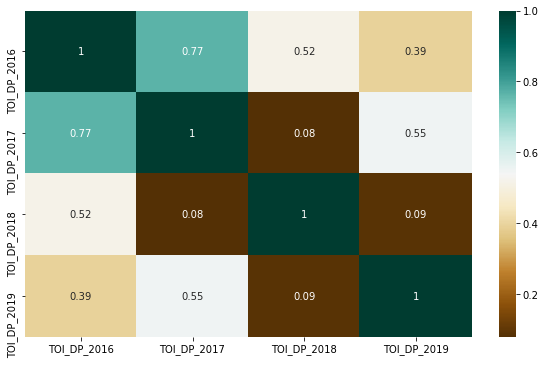

In [19]:
plt.figure(figsize =(10,6))
sns.heatmap(c,cmap = 'BrBG', annot = True)
c

In [22]:
dfAgeDrop

,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019
AGE_RANGE,,,,
"(-inf, 0.0]",5.379333e+04,5.952323e+04,1.387884e+05,4.059380e+07
"(0.0, 20.0]",2.671346e+10,3.177158e+10,5.348361e+10,6.538357e+10
"(20.0, 30.0]",1.793196e+11,2.331991e+11,2.370147e+11,5.299929e+11
"(30.0, 40.0]",7.040167e+11,7.668312e+11,1.168292e+12,1.285558e+12
"(40.0, 50.0]",9.667045e+11,9.367876e+11,1.330584e+12,1.358632e+12
"(50.0, 60.0]",8.002203e+11,7.023692e+11,9.774166e+11,9.546421e+11
"(60.0, 70.0]",4.120183e+11,3.412886e+11,4.680676e+11,4.541122e+11
"(70.0, 80.0]",1.080577e+11,8.731183e+10,1.173328e+11,1.142495e+11
"(80.0, inf]",3.342767e+10,2.476475e+10,3.019870e+10,2.815213e+10


In [23]:
dfAgeDrop.reset_index(inplace = True)

In [24]:
dfAgeDrop

,AGE_RANGE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019
0,"(-inf, 0.0]",5.379333e+04,5.952323e+04,1.387884e+05,4.059380e+07
1,"(0.0, 20.0]",2.671346e+10,3.177158e+10,5.348361e+10,6.538357e+10
2,"(20.0, 30.0]",1.793196e+11,2.331991e+11,2.370147e+11,5.299929e+11
3,"(30.0, 40.0]",7.040167e+11,7.668312e+11,1.168292e+12,1.285558e+12
4,"(40.0, 50.0]",9.667045e+11,9.367876e+11,1.330584e+12,1.358632e+12
5,"(50.0, 60.0]",8.002203e+11,7.023692e+11,9.774166e+11,9.546421e+11
6,"(60.0, 70.0]",4.120183e+11,3.412886e+11,4.680676e+11,4.541122e+11
7,"(70.0, 80.0]",1.080577e+11,8.731183e+10,1.173328e+11,1.142495e+11
8,"(80.0, inf]",3.342767e+10,2.476475e+10,3.019870e+10,2.815213e+10


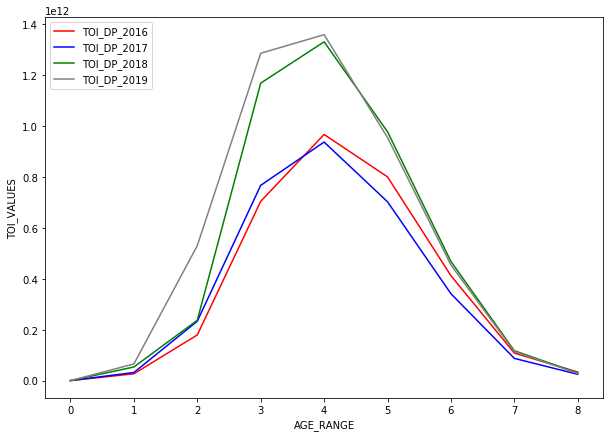

In [25]:
plt.figure(figsize =( 10, 7))
plt.plot(dfAgeDrop.TOI_DP_2016, color = 'red', label = 'TOI_DP_2016')
plt.plot(dfAgeDrop.TOI_DP_2017, color = 'blue', label = 'TOI_DP_2017')
plt.plot(dfAgeDrop.TOI_DP_2018, color = 'green', label = 'TOI_DP_2018')
plt.plot(dfAgeDrop.TOI_DP_2019, color = 'gray', label = 'TOI_DP_2019')

plt.xlabel('AGE_RANGE')
plt.ylabel('TOI_VALUES')
plt.legend( loc ='upper left')

plt.show()

In [49]:
dfAge = df_dp.groupby(df_dp.AGE).count()

In [ ]:
# Get 0 < Age < 100
# 
# the fluctuation of number customer by years ==> line

In [52]:
df_dp.head()

,CUSTOMER_CDE,AGE,GENDER_CDE,MARITAL_STATUS,SUB_SECTOR_CDE,OCCUPATION,PROVINCE_CDE,SUB_INDUSTRY_CDE,SUB_SEGMENT_CDE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019,AGE_RANGE
0,10000839,27,FEMALE,MARRIED,1700,STUDENT,5000,4231,-1,NaN,2100.694475,27259.830180,183894.700577,"(20.0, 30.0]"
1,10000840,28,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,418.611170,544.676157,539.999980,"(20.0, 30.0]"
2,10000841,29,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,420.138948,544.676157,539.999980,"(20.0, 30.0]"
3,10000842,31,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,420.138948,544.676157,539.999980,"(30.0, 40.0]"
4,10000846,38,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,418.611170,544.676157,539.999980,"(30.0, 40.0]"


,CUSTOMER_CDE,GENDER_CDE,MARITAL_STATUS,SUB_SECTOR_CDE,OCCUPATION,PROVINCE_CDE,SUB_INDUSTRY_CDE,SUB_SEGMENT_CDE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019,AGE_RANGE
AGE,,,,,,,,,,,,,
0,261,261,261,261,261,261,261,261,2,2,2,261,261
1,1886,1886,1886,1886,1886,1886,1886,1886,3,4,364,1868,1886
2,3321,3321,3321,3321,3321,3321,3321,3321,2,510,2222,3040,3321
3,5310,5310,5310,5310,5310,5310,5310,5310,573,3277,4132,4117,5310
4,8414,8414,8414,8414,8414,8414,8414,8414,4454,6272,6056,5528,8414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,2,2,2,2,2,2,2,2,2,1,0,0,2
1014,2,2,2,2,2,2,2,2,1,2,1,1,2
1016,1,1,1,1,1,1,1,1,1,1,1,1,1


In [26]:
df_dp.head()

,CUSTOMER_CDE,AGE,GENDER_CDE,MARITAL_STATUS,SUB_SECTOR_CDE,OCCUPATION,PROVINCE_CDE,SUB_INDUSTRY_CDE,SUB_SEGMENT_CDE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019,AGE_RANGE
0,10000839,27,FEMALE,MARRIED,1700,STUDENT,5000,4231,-1,NaN,2100.694475,27259.830180,183894.700577,"(20.0, 30.0]"
1,10000840,28,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,418.611170,544.676157,539.999980,"(20.0, 30.0]"
2,10000841,29,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,420.138948,544.676157,539.999980,"(20.0, 30.0]"
3,10000842,31,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,420.138948,544.676157,539.999980,"(30.0, 40.0]"
4,10000846,38,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,418.611170,544.676157,539.999980,"(30.0, 40.0]"


In [27]:
dfGender = df_dp.groupby('GENDER_CDE').sum()

In [28]:
dfGender

,AGE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019
GENDER_CDE,,,,,
FEMALE,129460185,1.830329e+12,1.734766e+12,2.361378e+12,2.656861e+12
MALE,123638871,1.381987e+12,1.375164e+12,2.003844e+12,2.117216e+12
UNKNOW,1581479,1.816273e+10,1.439445e+10,1.716741e+10,1.668669e+10


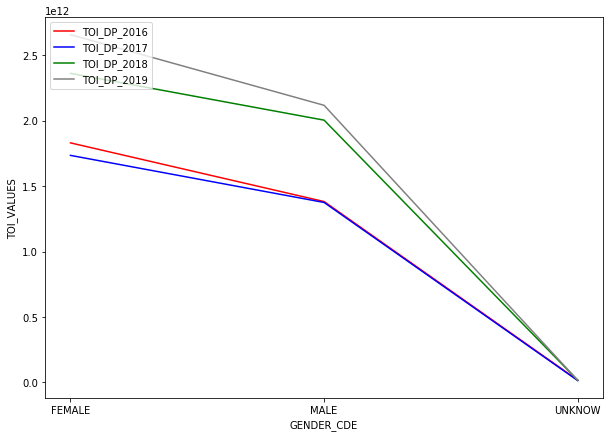

In [29]:
plt.figure(figsize =( 10, 7))
plt.plot(dfGender.TOI_DP_2016, color = 'red', label = 'TOI_DP_2016')
plt.plot(dfGender.TOI_DP_2017, color = 'blue', label = 'TOI_DP_2017')
plt.plot(dfGender.TOI_DP_2018, color = 'green', label = 'TOI_DP_2018')
plt.plot(dfGender.TOI_DP_2019, color = 'gray', label = 'TOI_DP_2019')

plt.xlabel('GENDER_CDE')
plt.ylabel('TOI_VALUES')
plt.legend( loc ='upper left')

plt.show()

In [30]:
dfGender

,AGE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019
GENDER_CDE,,,,,
FEMALE,129460185,1.830329e+12,1.734766e+12,2.361378e+12,2.656861e+12
MALE,123638871,1.381987e+12,1.375164e+12,2.003844e+12,2.117216e+12
UNKNOW,1581479,1.816273e+10,1.439445e+10,1.716741e+10,1.668669e+10


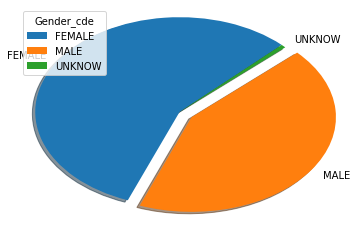

In [101]:
labels = dfGender.index.values
Explore = [0,0.1,0]
plt.pie(dfGender.TOI_DP_2016, explode = Explore,  labels = labels, shadow = True, startangle = 45)

plt.axis('auto')
plt.legend(title = 'Gender_cde')
plt.show()

In [51]:
dfGenderPercent = df_dp.groupby('GENDER_CDE').sum()
calculPer = lambda x: (x/sum(x))*100
df_1 = dfGenderPercent.transform(calculPer)

In [52]:
df_1

,AGE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019
GENDER_CDE,,,,,
FEMALE,50.832383,56.658131,55.524517,53.883344,55.457988
MALE,48.546651,42.779638,44.014761,45.724920,44.193703
UNKNOW,0.620966,0.562230,0.460722,0.391736,0.348310


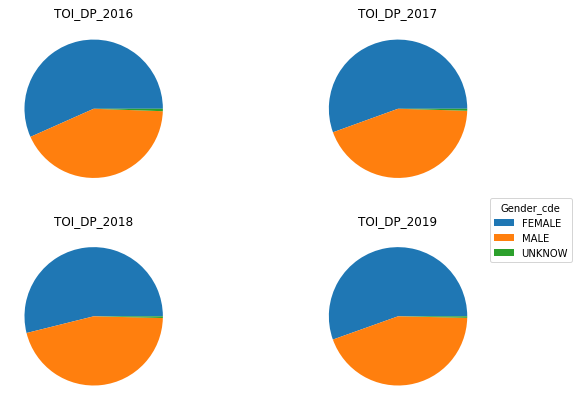

In [100]:

fig, axs = plt.subplots(2,2,figsize = (10,7))
plt.tick_params(top = True)
labels = dfGender.index.values
#fig.suptitle ('Percentage of TOI by years')
axs[0,0].pie(df_1.TOI_DP_2016)
axs[0,0].set_title('TOI_DP_2016')

axs[0,1].pie(df_1.TOI_DP_2017)
axs[0,1].set_title('TOI_DP_2017')

axs[1,0].pie(df_1.TOI_DP_2018)
axs[1,0].set_title('TOI_DP_2018')

axs[1,1].pie(df_1.TOI_DP_2019)
axs[1,1].set_title('TOI_DP_2019')
plt.legend(labels, title = 'Gender_cde', loc = 'center left', bbox_to_anchor = (1,1,1,0))

plt.show()

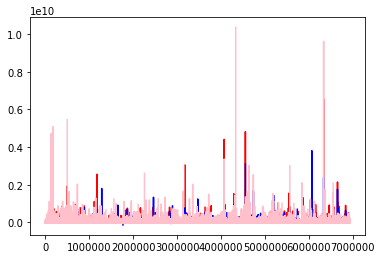

In [107]:
plt.plot(df_dp.TOI_DP_2016, c ='red')
plt.plot(df_dp.TOI_DP_2017, c= 'blue')
#plt.plot(df_dp.TOI_DP_2018, c= 'green')
plt.plot(df_dp.TOI_DP_2019, c= 'pink')

plt.show()

In [ ]:
fig, axs = plt.subplots(2,2,figsize = (10,7))
plt.tick_params(top = True)
labels = dfGender.index.values
#fig.suptitle ('Percentage of TOI by years')
axs[0,0].pie(df_1.TOI_DP_2016)
axs[0,0].set_title('TOI_DP_2016')

In [26]:
df_dp.head()

,CUSTOMER_CDE,AGE,GENDER_CDE,MARITAL_STATUS,SUB_SECTOR_CDE,OCCUPATION,PROVINCE_CDE,SUB_INDUSTRY_CDE,SUB_SEGMENT_CDE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019,AGE_RANGE
0,10000839,27,FEMALE,MARRIED,1700,STUDENT,5000,4231,-1,NaN,2100.694475,27259.830180,183894.700577,"(20.0, 30.0]"
1,10000840,28,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,418.611170,544.676157,539.999980,"(20.0, 30.0]"
2,10000841,29,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,420.138948,544.676157,539.999980,"(20.0, 30.0]"
3,10000842,31,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,420.138948,544.676157,539.999980,"(30.0, 40.0]"
4,10000846,38,FEMALE,SINGLE,1700,STUDENT,5000,7311,-1,NaN,418.611170,544.676157,539.999980,"(30.0, 40.0]"


In [105]:
df_dp.describe()

,AGE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019
count,6.930198e+06,3.970729e+06,4.491139e+06,5.247649e+06,5.890318e+06
mean,3.674939e+01,8.135731e+05,6.956640e+05,8.351148e+05,8.133285e+05
std,1.412508e+01,8.670364e+06,6.561954e+06,7.389108e+07,1.025213e+07
min,0.000000e+00,-2.477037e+07,-1.342930e+08,-1.681858e+11,-9.147669e+07
25%,2.700000e+01,2.795833e+03,2.619865e+03,2.610457e+03,2.776194e+03
50%,3.500000e+01,1.503497e+04,1.355629e+04,1.182411e+04,1.262068e+04
75%,4.500000e+01,1.815430e+05,1.719029e+05,1.791838e+05,1.807841e+05
max,1.020000e+03,6.540127e+09,3.808193e+09,5.972468e+09,1.036573e+10


In [113]:
df_dp[df_dp.TOI_DP_2018 == df_dp.TOI_DP_2018.min()]

,CUSTOMER_CDE,AGE,GENDER_CDE,MARITAL_STATUS,SUB_SECTOR_CDE,OCCUPATION,PROVINCE_CDE,SUB_INDUSTRY_CDE,SUB_SEGMENT_CDE,TOI_DP_2016,TOI_DP_2017,TOI_DP_2018,TOI_DP_2019,AGE_RANGE
601522,10177528,25,FEMALE,DIVORCED,1700,,6600,900,-1,NaN,769311.151826,-1.681858e+11,2.163255e+07,"(20.0, 30.0]"


In [114]:
df_dp.TOI_DP_2018.min()

-168185840908.84128

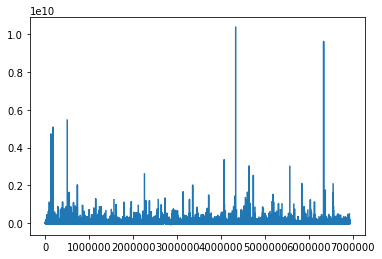

In [117]:

plt.plot(df_dp.TOI_DP_2019)
plt.show()

Take note: 

In [41]:
df2016 = df_dp[['TOI_DP_2016']]

In [42]:
df2016.shape

(6930198, 1)

In [43]:
df2016 = df2016.dropna()

In [44]:
df2016.shape

(3970729, 1)

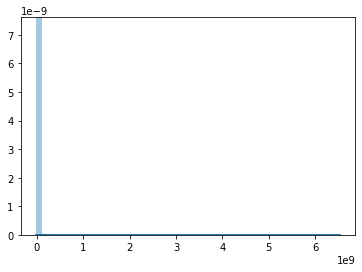

In [45]:
sns.distplot(df2016)
plt.show()